# PME3481 - Controle e Aplicações

## Síntese por Alocação de Polos

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

### Definição

In [100]:
def place_poles(A, B, poles):
    """
    Place the poles of a system defined by its state matrix A and input matrix B.
    """
    rank_B = np.linalg.matrix_rank(B)
    unique_poles, counts = np.unique(poles, return_counts=True)
    
    for pole, count in zip(unique_poles, counts):
        if count > rank_B:
            # Adjust the repeated pole to ensure controllability
            poles[poles == pole] += 1e-6  # Adding a small perturbation
    
    sys = ctrl.StateSpace(A, B, np.eye(A.shape[0]), np.zeros((A.shape[0], B.shape[1])))
    K = ctrl.place(sys.A, sys.B, poles)
    return K

Agora, utilizando nas matrizes do problema

In [101]:
Xcm = 1.052
Xpe = 0.261
L = 3.304
Df = 0.127
Tlin = 230.57
Izz = 15.07
M = 23.545
g = 9.8055
dar = 1.091
Cd = 0.432
Vxlin = -10.0

In [102]:
# X = [x,y,theta,xp,yp,thetap]
# Xp = [xp,yp,thetap,xpp,ypp,thetapp]
# X = [x,y,theta,xp,yp,thetap]
# Xp = [xp,yp,thetap,xpp,ypp,thetapp]
A = np.array([[0, 0, 0, 1],
              [(1/M)*((1/2)*dar*Cd*Vxlin**2*L*Df), (1/M)*(Vxlin *dar*Cd*((Df/2)**2*np.pi)), 0, 0],
              [(1/M)*(-M*g+(1/2)*Vxlin**2*dar*Cd*(np.pi*(Df/2)**2)), 0, 0, 0],
              [(1/Izz)*((1/2)*Vxlin**2*dar*Xpe*Cd*(np.pi*(Df/2)**2)), 0, 0, 0]])

B = np.array([[0, 0],
              [1/M, 0],
              [0, -Tlin/M],
              [0, -Tlin*Xcm/Izz]])

C = np.array([[ 1, 0, 0, 0],
              [ 0, 1, 0, 0],
              [ 0, 0, 1, 0],
              [ 0, 0, 0, 1]])

D = np.array([[ 0, 0],
              [ 0, 0],
              [ 0, 0],
              [ 0, 0]])

cont = ctrl.StateSpace(A, B, C, D)

print(cont)

A = [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
     [ 4.19975124e-01 -2.53575404e-03  0.00000000e+00  0.00000000e+00]
     [-9.79282123e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
     [ 5.17014925e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

B = [[  0.           0.        ]
     [  0.04247186   0.        ]
     [  0.          -9.79273731]
     [  0.         -16.09553019]]

C = [[1. 0. 0. 0.]
     [0. 1. 0. 0.]
     [0. 0. 1. 0.]
     [0. 0. 0. 1.]]

D = [[0. 0.]
     [0. 0.]
     [0. 0.]
     [0. 0.]]



Algumas análises do modelo

### Polos em Malha Aberta

[-0.00253575+0.j  0.        +0.j  0.07190375+0.j -0.07190375+0.j]


c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\lti.py:118: RuntimeWarning: invalid value encountered in divide
  zeta = -real(splane_poles)/wn


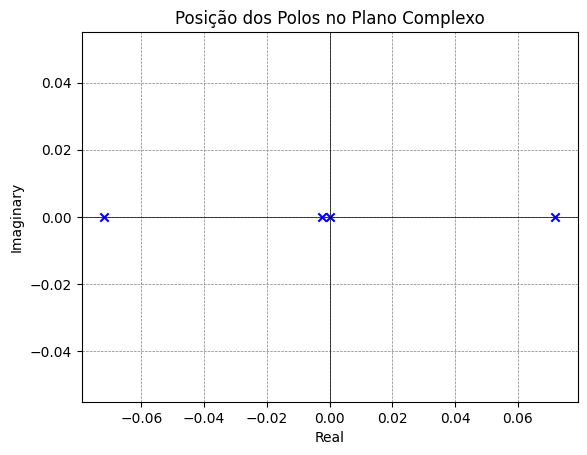

In [103]:
wn, zeta, poles = cont.damp()
print(poles)

# Plot the poles on a complex plane
plt.figure()
plt.scatter(poles.real, poles.imag, marker='x', color='b')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Posição dos Polos no Plano Complexo')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

In [104]:
# Create the state-space model
sys = ctrl.ss(A, B, C, D)

### Reposta em Degrau

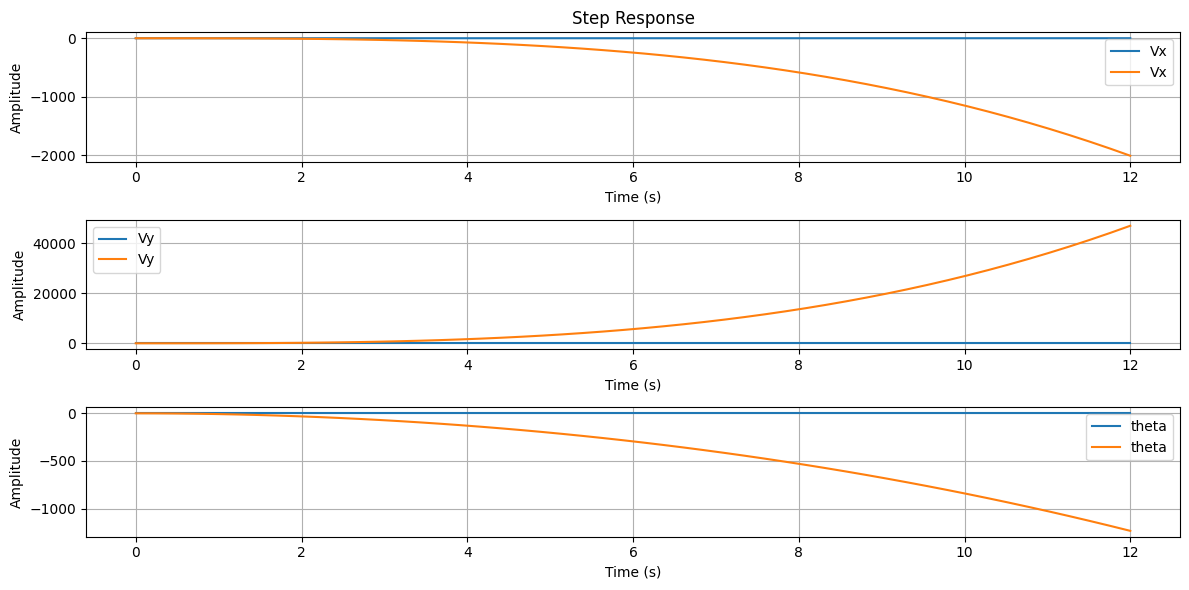

In [105]:
# Plot the step response
plt.figure(figsize=(12, 6))

# Plot x response
plt.subplot(3, 1, 1)
t = np.linspace(0, 12)  # Time range from 0 to 12 seconds
t, y = ctrl.step_response(sys, T=t)
plt.plot(t, y[1].T, label='Vx')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Step Response')
plt.legend()
plt.grid()

# Plot y response
plt.subplot(3, 1, 2)
plt.plot(t, y[2].T, label='Vy')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Plot theta response
plt.subplot(3, 1, 3)
plt.plot(t, y[0].T, label='theta')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Alocação de Polos

In [106]:
# Desired poles
p = [-4.75,-3, -1.5,-2.5]

# Calculate the gain matrix K using pole placement
K = ctrl.place(A, B, p)

# Compute the closed-loop system
Acl = A - np.dot(B, K)
syscl = ctrl.ss(Acl, B, C, D)
# Print the poles of the closed-loop system
wnk, zetak , pk = syscl.damp()
print("Poles of the closed-loop system:", pk)
print("Zetas of the closed-loop system:", zetak)
print("Wns of the closed-loop system:", wnk)

Poles of the closed-loop system: [-4.75+0.j -1.5 +0.j -2.5 +0.j -3.  +0.j]
Zetas of the closed-loop system: [1. 1. 1. 1.]
Wns of the closed-loop system: [4.75 1.5  2.5  3.  ]


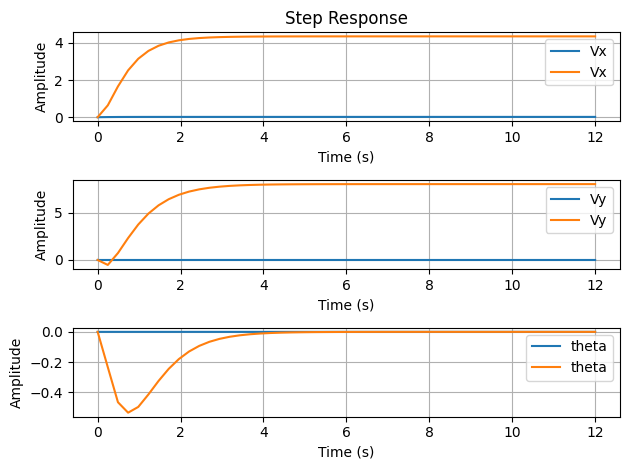

In [107]:
# Plot x response
plt.subplot(3, 1, 1)
t = np.linspace(0, 12)  # Time range from 0 to 12 seconds
t, y, r = ctrl.step_response(syscl, T=t, return_x = True)
plt.plot(t, r[1].T, label='Vx')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Step Response')
plt.legend()
plt.grid()

# Plot y response
plt.subplot(3, 1, 2)
plt.plot(t, r[2].T, label='Vy')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Plot theta response
plt.subplot(3, 1, 3)
plt.plot(t, r[0].T, label='theta')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()